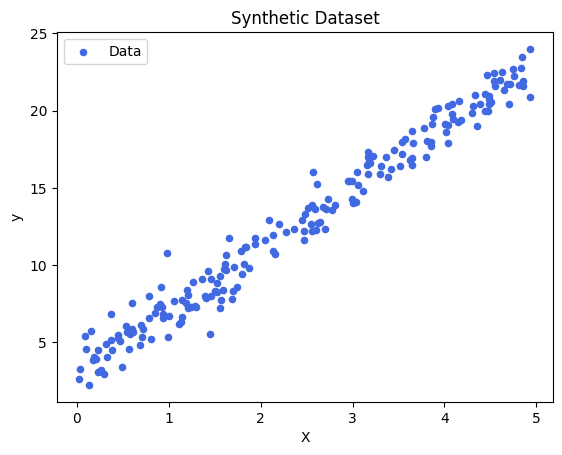

Closed-form coefficients -> Intercept: 3.1052, Slope: 3.9844


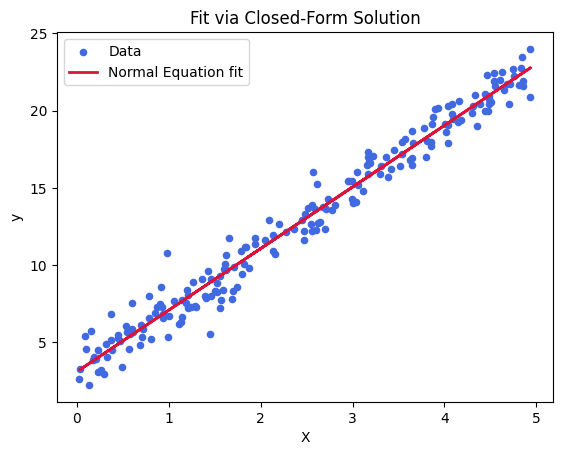

Gradient Descent coefficients -> Intercept: 3.1052, Slope: 3.9844


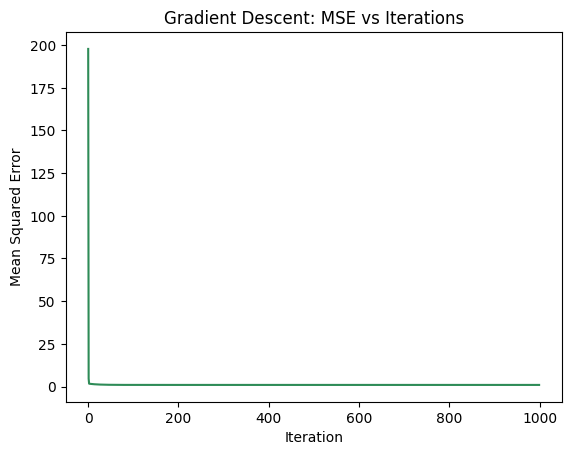

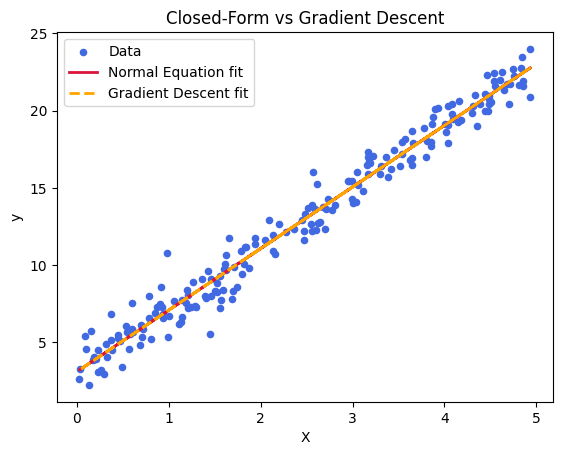


Summary:
Normal Equation -> Intercept: 3.11, Slope: 3.98
Gradient Descent -> Intercept: 3.11, Slope: 3.98
Observation: With an appropriate learning rate, Gradient Descent converges to the same solution as the Closed-form approach.


In [5]:
# ---------------------------------------------------------
# Linear Regression: Closed-Form Solution vs Gradient Descent
# ---------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# 1️ Create synthetic dataset
np.random.seed(42)
n_samples = 200
X = np.random.uniform(0, 5, n_samples)
noise = np.random.normal(0, 1, n_samples)
y = 3 + 4 * X + noise   # underlying linear relationship

# 2️ Plot raw data
plt.scatter(X, y, color="royalblue", s=20, label="Data")
plt.title("Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 3️ Closed-Form (Normal Equation)
X_bias = np.c_[np.ones((n_samples, 1)), X]
theta_normal = np.linalg.inv(X_bias.T @ X_bias) @ (X_bias.T @ y)
b_normal, w_normal = theta_normal

print(f"Closed-form coefficients -> Intercept: {b_normal:.4f}, Slope: {w_normal:.4f}")

# Show fit from closed-form
plt.scatter(X, y, color="royalblue", s=20, label="Data")
plt.plot(X, X_bias @ theta_normal, color="crimson", lw=2, label="Normal Equation fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Fit via Closed-Form Solution")
plt.legend()
plt.show()

# 4️ Gradient Descent
theta = np.zeros(2)
lr = 0.05
epochs = 1000
loss_values = []

for _ in range(epochs):
    preds = X_bias @ theta
    error = preds - y
    grad = (2 / n_samples) * X_bias.T @ error
    theta -= lr * grad
    loss_values.append(np.mean(error ** 2))

b_gd, w_gd = theta
print(f"Gradient Descent coefficients -> Intercept: {b_gd:.4f}, Slope: {w_gd:.4f}")

# 5️ Loss curve
plt.plot(range(epochs), loss_values, color="seagreen")
plt.title("Gradient Descent: MSE vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

# 6️ Combined plot
plt.scatter(X, y, color="royalblue", s=20, label="Data")
plt.plot(X, X_bias @ theta_normal, color="crimson", lw=2, label="Normal Equation fit")
plt.plot(X, X_bias @ theta, color="orange", lw=2, ls="--", label="Gradient Descent fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Closed-Form vs Gradient Descent")
plt.legend()
plt.show()

# 7️ Short conclusion
print("\nSummary:")
print(f"Normal Equation -> Intercept: {b_normal:.2f}, Slope: {w_normal:.2f}")
print(f"Gradient Descent -> Intercept: {b_gd:.2f}, Slope: {w_gd:.2f}")
print("Observation: With an appropriate learning rate, Gradient Descent converges to the same solution as the Closed-form approach.")
